In [ ]:
# Chris sutton 
# HW #5


from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import optim
from torch import nn as nn


from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, transforms
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Import and Store Data for the Model

In [ ]:
# Download training data from open datasets.
training_d = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

train_data, valid_data = random_split(training_d,[45000,5000])

# Download test data from open datasets.
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

train_dataloader = DataLoader(train_data, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


#### CNN Alexnet model Construction 

In [ ]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 48, kernel_size=3, stride=1, padding=1), 
            nn.BatchNorm2d(48),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(48, 96, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(96, 192, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(192, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2))
        self.fc1 = nn.Sequential(
            nn.Linear(4096, 512),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU())
        self.fc_out= nn.Sequential(
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1)
            )
        
    def forward(self, x):
        # print("out from layer0" , x.size())
        out = self.layer1(x)
        # print("out from layer1" ,out.size())
        out = self.layer2(out)
        # print("out from layer2" ,out.size())
        out = self.layer3(out)
        # print("out from layer3" ,out.size())
        out = self.layer4(out)
        # print("out from layer4" ,out.size())
        out = self.layer5(out)
        # print("out from layer5" ,out.size())
        out = out.reshape(out.size(0), -1)
        # print("out from layer5_out" ,out.size())
       
        out = self.fc1(out)
        # print("out from fc1" ,out.size())
        out = self.fc2(out)
        # print("out from fc2" ,out.size())
        out = self.fc_out(out)
        # print("out from fc_out" ,out.size())
      
        return out

#### For the other edited networks I simply provide the edits in this text box to show what was done to recreate the results. I have the code in multiple parallel workbooks to facilitate faster completion time. 



#### For the removal of layer 6, the edit is as follows

     self.layer5 = nn.Sequential(
            nn.Conv2d(192, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2))
        # self.fc1 = nn.Sequential(
        #     # nn.Dropout(0.5),
        #     nn.Linear(4096, 512),
        #     nn.ReLU())
        self.fc2 = nn.Sequential(
            # nn.Dropout(0.5),
            nn.Linear(4096, 256),
            nn.ReLU())
        self.fc_out= nn.Sequential(
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1)
            )

#### For the removal of layer 5, the edit is as follows

     self.layer4 = nn.Sequential(
            nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU())
        # self.layer5 = nn.Sequential(
        #     nn.Conv2d(192, 256, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm2d(256),
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size = 2))
        self.fc1 = nn.Sequential(
            # nn.Dropout(0.5),
            nn.Linear(12288, 512),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            # nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU())
        self.fc_out= nn.Sequential(
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1)
            )

#### For the removal of layer 4, the edit is as follows

    self.layer3 = nn.Sequential(
            nn.Conv2d(96, 192, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU())
        # self.layer4 = nn.Sequential(
        #     nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1),
        #     nn.BatchNorm2d(192),
        #     nn.ReLU())
        self.layer5 = nn.Sequential(
            nn.Conv2d(192, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2))
        self.fc1 = nn.Sequential(
            # nn.Dropout(0.5),
            nn.Linear(4096, 512),
            nn.ReLU())
        self.fc2 = nn.Sequential(
            # nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU())
        self.fc_out= nn.Sequential(
            nn.Linear(256, 10),
            nn.LogSoftmax(dim=1)
            )

### CNN Alexnet Model Hyperparameters

In [ ]:
num_epochs = 20
learning_rate = 0.005

model = AlexNet().to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  


# Train the model
total_step = len(train_dataloader)
print(total_step)

704


### CNN Alexnet Model Training

In [ ]:
total_step = len(train_dataloader)
acc=[]
l=[]
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_dataloader):  
        # Move tensors to the configured device
        # print("images" ,images.size())
        # print("labels" ,labels.size())
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    l.append(loss.item())
    print ('Epoch {}, Loss: {:.4f}' 
                   .format(epoch+1, loss.item()))
            
    # Validation
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in valid_dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            del images, labels, outputs
        acc.append(correct / total)
        print('Accuracy of the network on the {} validation images: {} %'.format(5000, 100 * correct / total)) 
print(acc)
print(l)

Epoch 1, Loss: 1.0844
Accuracy of the network on the 5000 validation images: 64.48 %
Epoch 2, Loss: 1.1255
Accuracy of the network on the 5000 validation images: 72.54 %
Epoch 3, Loss: 0.4184
Accuracy of the network on the 5000 validation images: 74.84 %
Epoch 4, Loss: 0.1907
Accuracy of the network on the 5000 validation images: 77.86 %
Epoch 5, Loss: 0.1525
Accuracy of the network on the 5000 validation images: 78.78 %
Epoch 6, Loss: 0.7487
Accuracy of the network on the 5000 validation images: 79.98 %
Epoch 7, Loss: 0.4155
Accuracy of the network on the 5000 validation images: 79.14 %
Epoch 8, Loss: 0.6505
Accuracy of the network on the 5000 validation images: 80.46 %
Epoch 9, Loss: 0.6641
Accuracy of the network on the 5000 validation images: 82.04 %
Epoch 10, Loss: 0.0701
Accuracy of the network on the 5000 validation images: 81.5 %
Epoch 11, Loss: 0.5607
Accuracy of the network on the 5000 validation images: 82.06 %
Epoch 12, Loss: 0.5376
Accuracy of the network on the 5000 valid

In [ ]:
all_preds = []
all_labels = []
with torch.no_grad():
  
    correct = 0
    total = 0
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        preds = predicted.cpu().numpy()
        labels = labels.cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels)
        del images, labels, outputs
        
    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))   

Accuracy of the network on the 10000 test images: 81.1 %


Accuracy of the network after removing Layer 6 -  on the 10000 test images: 80.07 %

Accuracy of the network after removing Layer 5 - on the 10000 test images: 79.18 %

Accuracy of the network after removing Layer 4 - on the 10000 test images: 80.77 %

### Confusion Matrix for Full Network

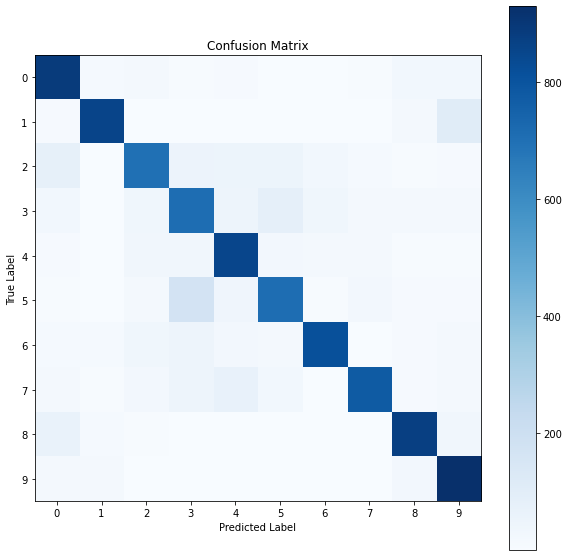

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(all_labels, all_preds)
# for x, y in zip(all_labels, all_preds):
#   print(x,y)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### confusion matrix after removing Layer 6

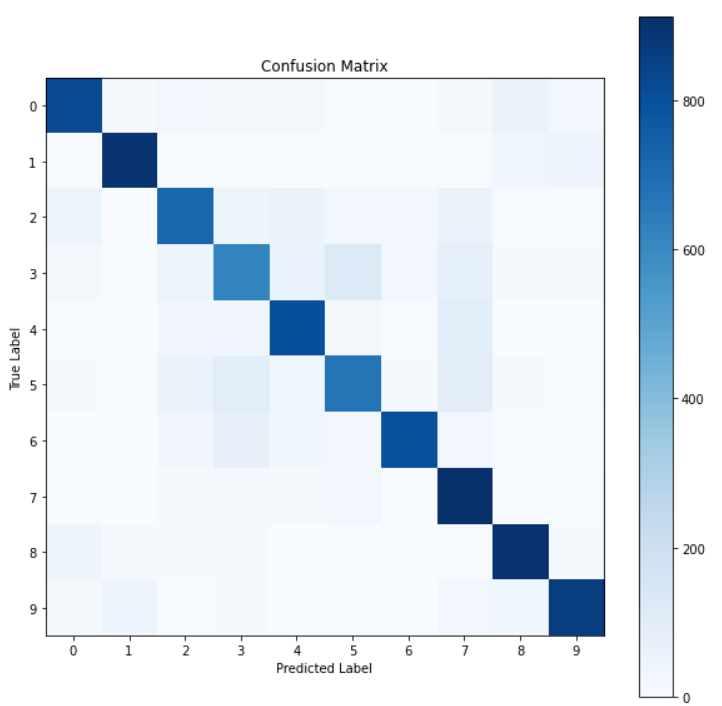

### confusion Matrix after removing layer 5

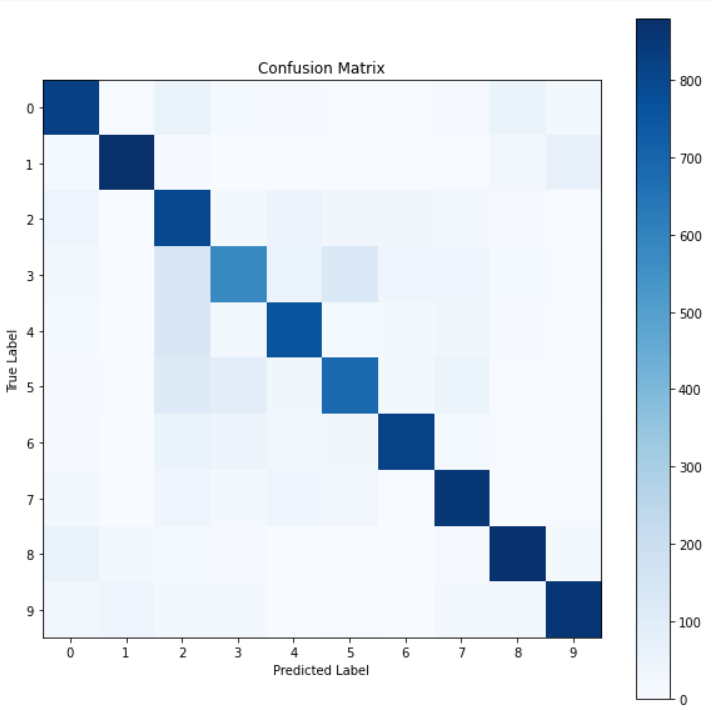

### Confusion Matrix after removing layer 4

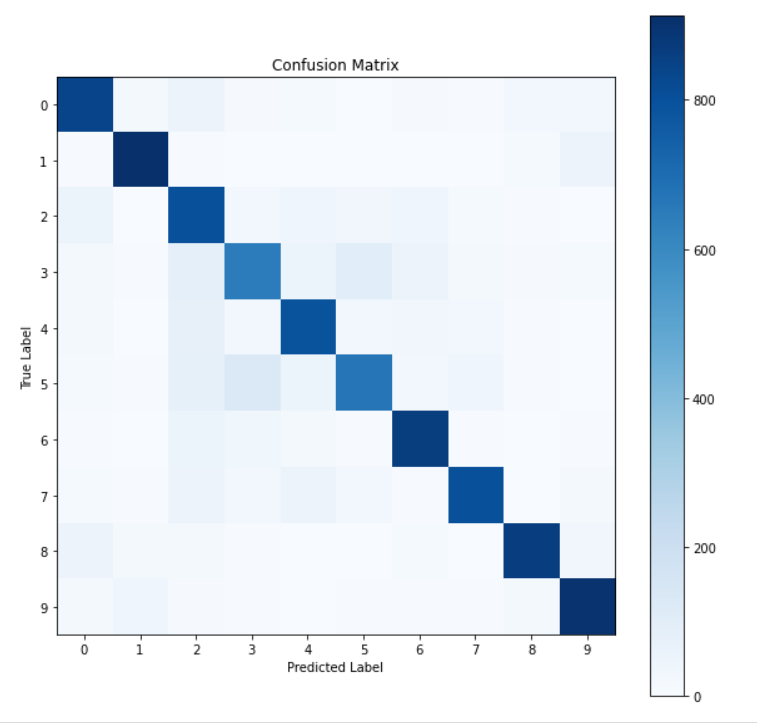

### Training Loss vs network type

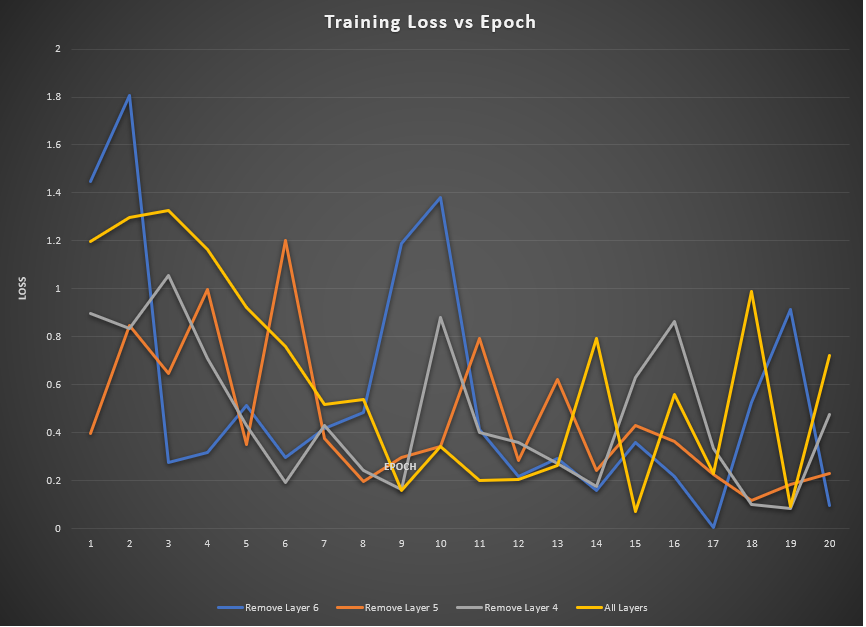

### Accuracy vs network type

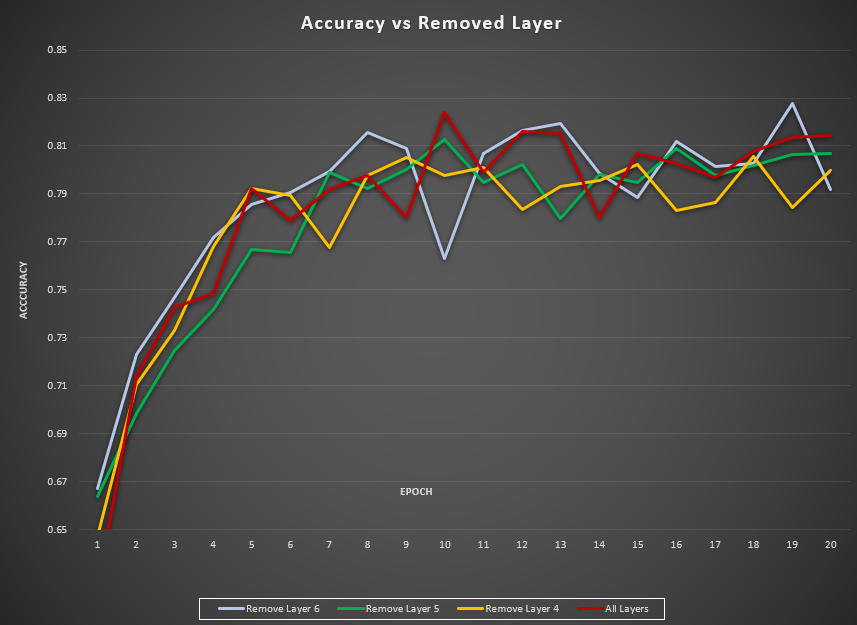

In [ ]:
# The above graphs show the relationship between the training, accuracy, and network type